## Network code for the midterm

Here we'll work through some example code for getting from a weighted matrix to a network. Then we will show how to compute the necessary network measures using the `networkx` package.

In [1]:
## Import packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import bct


<class 'numpy.ndarray'>
(100, 100)


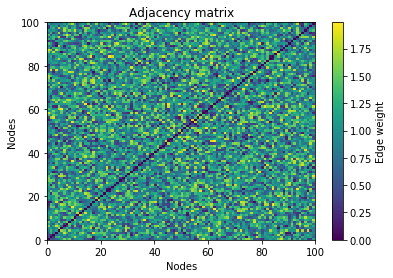

In [3]:
# For demonstration purposes, we'll use a random network

n_nodes = 100
adj = np.random.random((n_nodes, n_nodes))

# To be a weighted, undirected network like yours already will be, 
# we need to symmetrize and set the diagonal to 0.
adj[np.diag_indices(n_nodes)] = 0
adj = adj + np.transpose(adj)

print(type(adj))
print(adj.shape)

plt.pcolor(adj)
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.title('Adjacency matrix')
plt.colorbar(label = 'Edge weight');

## Matrix to networkx graph

This is where you will begin. You have been given an array corresponding to a weighted network. Here we will walk through creating a networkx graph object `G` with edge weights from the numpy array.

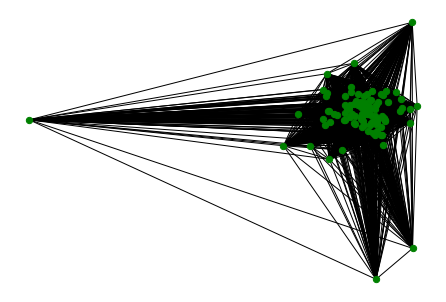

In [4]:
G = nx.from_numpy_array(adj, parallel_edges = False)


# If you would like to visualize the network, nx.draw_spectral is one method.
nx.draw_spectral(G, node_color = 'g', node_size = 40, edge_alpha = 0.1)

## Edge weights

Next we will look at how to extract edge weights from the graph `G`.

In [5]:
# print(G.edges(data = True)) to see all of the edge data in G


edge_weights = np.array([d['weight'] for u,v,d in G.edges(data = True)])



# How do we take the mean of a numpy array?

## Clustering coefficient

Onto the clustering coefficient. Here we will use the `clustering` function.

In [6]:
## Compute the clustering coefficient for each node in G.

clustering_array = nx.clustering(G, weight = 'weight')
print(clustering_array)

# Or we can use the nx.average_clustering function to compute the average
# directly

average_clustering_value = nx.average_clustering(G, weight = 'weight')
print(average_clustering_value)


{0: 0.44585872153678624, 1: 0.4634449962293592, 2: 0.46770679646434454, 3: 0.45798901726446667, 4: 0.4884497753473367, 5: 0.46130362655986973, 6: 0.46957604040796663, 7: 0.47762197554783903, 8: 0.46666009528492464, 9: 0.48770202959419334, 10: 0.49830326313887663, 11: 0.455811041800829, 12: 0.48225907222751346, 13: 0.47793763260770145, 14: 0.4836339210696981, 15: 0.4824533422759426, 16: 0.480971981571204, 17: 0.45604792940737837, 18: 0.46208175415142194, 19: 0.4766208635893204, 20: 0.5093443253423623, 21: 0.47005671595601667, 22: 0.46510608603197406, 23: 0.47125232373390114, 24: 0.48772352990434803, 25: 0.46121221097028553, 26: 0.4761642468573827, 27: 0.48380432243927435, 28: 0.4572218301843635, 29: 0.480278902625301, 30: 0.46552189786925874, 31: 0.4630268436558111, 32: 0.4549039265212141, 33: 0.4625345737349365, 34: 0.45842218419565106, 35: 0.4880878342455097, 36: 0.4882316206396209, 37: 0.4778646998466334, 38: 0.4651518638036777, 39: 0.47315318706986675, 40: 0.46935061466592987, 41: 0

## Characteristic path length/Average shortest path length

Finally we will compute the characteristic path length (also known as average shortest path length) using the networkx function `average_shortest_path_length`.

In [7]:

average_shortest_path_length_value = nx.average_shortest_path_length(G, weight = 'weight')
print(average_shortest_path_length_value)


0.515673998968191


## Randomizing networks

Question 5.3 asks about comparing our original networks to a randomized model. If we have a graph `G` and want to randomize it, we can swap the edges of the graph many times in order to effectively randomize the graph. When we repeat this procedure many times and then calculate graph metrics from these randomized networks, we create a null distribution.

In [8]:
# Creating one randomized graph using the randmio_und function from bctpy.
# bctpy uses the adjacency matrix instead of the networkx graph object.

# Recall adj is our graph adjacency matrix
# The second argument is the number of times each edge will be rewired.
# We'll keep it simple and choose 4.
adj_randomized_1 = bct.randmio_und(adj, 4)[0]

# Now adj_randomized_1 is our randomized graph in a numpy array form. 
# We can create a networkx graph from this using what we learned above.

G_randomized_1 = nx.from_numpy_array(adj_randomized_1, parallel_edges = False)
